# Лабораторная работа №3
## Проверка статистических гипотез о виде закона распределения.
__Вариант 21.__ $Y=arctg(x)$, $m_x = 2$, $\sigma_x=2\sqrt{3}$, $y_0=5$.

*__Задание 1.__* Доверительный интервал для математического ожидания СВ.

Импортируем необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
n = 200 #задается вручную

# найдены в 1-й ЛР
a = -4.
b = 8.

In [3]:
# формируем выборку
def get_sample(n):
    sample_X = []
    sample_Y = []
    uniform_rv = sts.uniform()
    sample_xi = uniform_rv.rvs(size=n)

    for i in range(n):
        x = sample_xi[i] * (b - a) + a
        sample_X.append(x)
        y = np.arctan(x)
        sample_Y.append(y)
    return sample_Y

sample_Y = get_sample(n)

Первым шагом метода Пирсона построим гистограмму равновероятностным способом, а также теоретическую плотность:

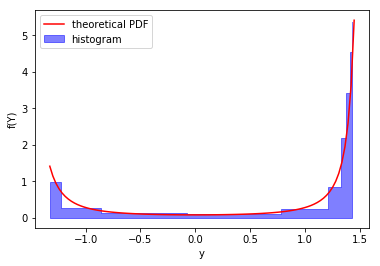

In [4]:
M = 10 # int(np.sqrt(n)) if n <= 100 else int(3 * np.log10(n)) # эмпирически определяем количество интервалов
m = n // M                                                # количество элементов в каждом интервале

def hist_eq_prob(sample):
    sample.sort()
    A = [sample[0]]
    B = []
    for i in range(1, M):
        A.append(sample[i * m])
        B.append(sample[i * m])
    B.append(sample[-1])
    d = []
    for i in range(len(A)):
        d.append(B[i] - A[i])
    y = []
    x = []
    s = A[0]
 
    for i in d:
        y.append(1. /(M * i))
        x.append(s)
        s += i
        
    return (A, B, d, x, y)

A, B, d, x, y = hist_eq_prob(sample_Y)
plt.fill_between(x, y1=y, y2=[0]*len(y), color='b', step='post', alpha=0.5, label="histogram")

xx = np.linspace(np.arctan(-4), np.arctan(8), 100)
py = 1./(12. * np.cos(xx)**2)
plt.plot(xx, py, label='theoretical PDF', c='r')

plt.legend(loc='upper left')
plt.xlabel("y")
plt.ylabel("f(Y)")
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу $H_0$, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством $\chi^2$ статистики. Пусть для определенности будем проверять для вероятности ошибки первого рода $\alpha = 0.01$.

In [5]:
table = pd.DataFrame(data={"$A_i$" : A, "$B_i$": B, "$d_i$": d, "$v_i$": [m]*len(d), "$f_i$": y})
table

,$A_i$,$B_i$,$d_i$,$v_i$,$f_i$
0,-1.325567,-1.222616,0.102951,20,0.971336
1,-1.222616,-0.861292,0.361324,20,0.276760
2,-0.861292,-0.075557,0.785734,20,0.127269
3,-0.075557,0.784560,0.860117,20,0.116263
4,0.784560,1.211497,0.426937,20,0.234227
5,1.211497,1.330642,0.119145,20,0.839310
6,1.330642,1.376514,0.045871,20,2.180004
7,1.376514,1.405709,0.029195,20,3.425224
8,1.405709,1.427739,0.022030,20,4.539196
9,1.427739,1.446378,0.018639,20,5.365200


Рассчитаем теоретическую вероятность попадания случайной величины в $i$-й интервал при условии, что гипотеза верна.

$$p_i=F(B_i)-F(A_i) = \big(\frac{1}{12}(tg(B_i)+4)-\frac{1}{12}(tg(A_i)+4)\big)=\frac{1}{12}(tg(B_i)-tg(A_i))$$

In [6]:
p = []
p_ = [m / n] * len(A)
FB = []
FA = []

for i in range(len(A)):
    FB.append(np.tan(B[i]))
    FA.append(np.tan(A[i]))
    p.append(1./12. * (np.tan(B[i]) - np.tan(A[i])))


Вычислим значение критерия $\chi^2$ по формуле:

$$ \chi^2 = n\sum_{i=1}^M \frac{(p_i-p_i^*)^2}{p_i}=\sum_{i=1}^M \frac{(\nu_i-np_i)^2}{np_i}$$

In [7]:
chi = []

for i in range(len(A)):
    chi.append(n * (p[i] - p_[i])**2 / p[i])

In [8]:
table2 = pd.DataFrame(data={"$F(A_i)$" : FA, "$F(B_i)$": FB, "$p_i$": p, "$p_i^*$": p_, "$\chi_i$": chi})
table2

,$F(A_i)$,$F(B_i)$,$p_i$,$p_i^*$,$\chi_i$
0,-3.995747,-2.755068,0.103390,0.1,0.022229
1,-2.755068,-1.164595,0.132539,0.1,1.597732
2,-1.164595,-0.075701,0.090741,0.1,0.188948
3,-0.075701,0.998325,0.089502,0.1,0.246259
4,0.998325,2.662383,0.138672,0.1,2.156878
5,2.662383,4.083634,0.118438,0.1,0.574047
6,4.083634,5.082219,0.083215,0.1,0.677090
7,5.082219,6.002270,0.076671,0.1,1.419693
8,6.002270,6.942470,0.078350,0.1,1.196491
9,6.942470,7.995883,0.087784,0.1,0.339970


Найдем статистику $\chi^2$:

In [9]:
chi_stat = sum(chi)
print(chi_stat)

8.419336714285926


Найдем количество степеней свободы. Так как наше распределение не зависит ни от каких параметров, то количество степеней свободы будет равнятся:
    $k = M - 1$

In [10]:
k = M - 1
print(k)

9


Теперь посмотрим в таблице значения $\chi_{\alpha,k}$ и $\chi_{1-\alpha,k}$ для полученных $\alpha$ и $k$. Они равно $\chi_{0.01, 9}=21.07$ и $\chi_{0.99, 9}=2.09$. Так как $\chi_{0.01, 9}< \chi < \chi_{0.99, 9}$, то нет оснований отвергать гипотезу $H_0$.

*__Задание 2.__* В соответствии с вариантом (см. задание 1) сформировать выборку из 30 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Колмогорова.

In [29]:
n = 30
sample_Y2 = get_sample(n)

Построим вариационный ряд:

In [30]:
sample_Y2.sort()
table_row = pd.DataFrame(data={"Значение": sample_Y2})
table_row.T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
Значение,-1.318538,-1.299966,-1.283482,-1.272877,-1.198906,-1.182377,-1.098577,-1.067371,-0.729318,-0.702702,...,1.261352,1.290272,1.323339,1.343765,1.352111,1.394555,1.397105,1.410862,1.416232,1.444681


Построим графики теоретической и эмпирической функций распределения:

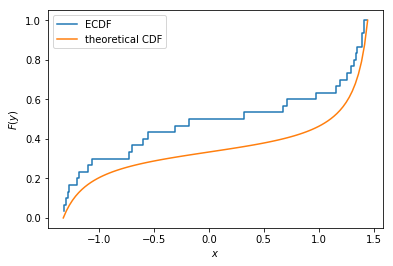

In [31]:
# для построения ECDF (эмпирическая функция распределения) используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample_Y2)
plt.step(ecdf.x, ecdf.y, label='ECDF')

xx = np.linspace(np.arctan(-4), np.arctan(8), 100)
yy = (np.tan(xx) + 4) / 12
plt.plot(xx, yy, label='theoretical CDF')

plt.ylabel('$F(y)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

Видим, что гистограмма и плотность очень похожи. Выдвинем гипотезу $H_0$, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Колмогорова. Пусть для определенности будем проверять для вероятности ошибки первого рода $\alpha = 0.05$.

Найдем $d_n = max|F(x_i)-F_n(x_i)| = max(d_n^+,d_n^-)$, где $d_n^+=max|\frac{i}{n}-F(x_i)|, d_n^-=max|\frac{i-1}{n}-F(x_i)|$:

In [32]:
def F(x):
    return (np.tan(x) + 4) / 12

dp = []
dm = []

for i in range(n - 1):
    dp.append(abs((i + 1) / n - F(sample_Y2[i])))
    dm.append(abs(i / n - F(sample_Y2[i])))
    
d = max(max(dm), max(dp))
print (d)

0.16165457165633157


Вычислим $\lambda =d \sqrt{n}$:

In [33]:
l = d * np.sqrt(n)
print(l)

0.8854185542000806


Наша доверительная вероятность равна $\gamma = 1-\alpha = 0.95$. Тогда по таблице фукции Колмогорова определяем критическое значение $\lambda => \lambda_{\gamma} = 1.36$. Так как $0 < \lambda < \lambda_\gamma$, то нет основания отвергать гипотезу $H_0$.

*__Задание 3.__* В соответствии с вариантом (см. задание 1) сформировать выборку из 50 случайных чисел. Проверить гипотезу о соответствии выборке теоретическому закону распределения по критерию согласия Мизеса.

In [34]:
n = 50
sample_Y3 = get_sample(n)
sample_Y3.sort()

Выдвинем гипотезу $H_0$, что наши эмпирическое и теоретическое распределения согласуются, и будем проверять ее посредством критерия Мизеса. Пусть для определенности будем проверять для вероятности ошибки первого рода $\alpha = 0.05$.

Найдем и сведем в таблицу значения эмпирической функции распределения $F_n(x_i)=\frac{i-0.5}{n}$, значение теоретической функции распределения $F(x_i)$, значения квадрата отклонения $\delta=(F_n(x_i)-F(x_i))^2$:

In [35]:
Fny = []
F0y = []
delta = []

for i in range(n):
    Fny.append((i + 0.5) / n) # знак +, т.к. нумерация начинается с нуля
    F0y.append(F(sample_Y3[i]))
    delta.append((Fny[i] - F0y[i])**2)

table3 = pd.DataFrame(data={"$y$": sample_Y3, "$F_n$": Fny, "$F$": F0y, "$\delta$": delta})
table3

,$y$,$F_n$,$F$,$\delta$
0,-1.289701,0.01,0.044724,1.205755e-03
1,-1.266406,0.03,0.068070,1.449318e-03
2,-1.242377,0.05,0.088782,1.504018e-03
3,-1.215120,0.07,0.109002,1.521192e-03
4,-1.213327,0.09,0.110228,4.091852e-04
5,-1.212149,0.11,0.111028,1.055873e-06
6,-0.964523,0.13,0.213150,6.913942e-03
7,-0.843547,0.15,0.239698,8.045714e-03
8,-0.836950,0.17,0.240933,5.031438e-03
9,-0.775861,0.19,0.251575,3.791436e-03


Посчитаем фактическое значение статистики $n\sigma^2_n=\frac{1}{12n} + \sum_{i=0}^{n} \delta_i$:

In [36]:
stat3 = 1. / (12 * n) + sum(delta)
print(stat3)

0.15379766508450712


Кртитическое значение статистики Мизеса на уровне значимости $\alpha=0.05$ по таблице равно $n\sigma^2_{\alpha}=0.461$. Так как $n\sigma^2_n < n\sigma^2_{\alpha}$, то нет оснований отвергать гипотезу $H_0$.